COVID-19

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [64]:

cancer = load_breast_cancer()
X = pd.read_csv('country_wise_latest-covid 19.csv')
X.head()



,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [65]:
X.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [66]:
X.dropna()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [68]:
X.shape

(187, 15)

In [69]:
X.isnull().any()

Country/Region            False
Confirmed                 False
Deaths                    False
Recovered                 False
Active                    False
New cases                 False
New deaths                False
New recovered             False
Deaths / 100 Cases        False
Recovered / 100 Cases     False
Deaths / 100 Recovered    False
Confirmed last week       False
1 week change             False
1 week % increase         False
WHO Region                False
dtype: bool

Encoding

In [70]:
 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
l = ['Country/Region','WHO Region']
for i in l:
   X[i]= label_encoder.fit_transform(X[i]) 
  

In [71]:
X.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,2
1,1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,3
2,2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,0
3,3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,3
4,4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,0


Outilier removal

In [72]:
from scipy.stats import zscore
z_scores = zscore(X)
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
X = X[~outliers]

# Print the number of removed outliers
print(f'Number of outliers removed: {sum(outliers)}')

Number of outliers removed: 14


In [73]:
X.shape

(173, 15)

In [74]:
X = X.dropna()
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [75]:
X.describe()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase,WHO Region
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,93.312139,39186.572254,1362.520231,26807.768786,11016.283237,408.283237,11.381503,362.381503,2.554740,66.471445,35938.312139,3248.260116,10.990347,1.942197
std,53.762243,94363.516608,4500.733268,71225.545513,26618.833530,968.694864,40.694467,1121.806975,2.263232,25.710147,87681.795346,8575.826093,11.171735,1.598368
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-47.000000,-3.840000,0.000000
25%,47.000000,1100.000000,18.000000,607.000000,128.000000,3.000000,0.000000,0.000000,0.910000,51.990000,1039.000000,44.000000,2.750000,0.000000
50%,95.000000,4880.000000,91.000000,2547.000000,1599.000000,44.000000,0.000000,19.000000,2.000000,73.350000,4370.000000,401.000000,6.890000,2.000000
75%,140.000000,33624.000000,543.000000,18837.000000,7673.000000,402.000000,5.000000,200.000000,3.500000,87.870000,28430.000000,2828.000000,16.060000,3.000000
max,186.000000,816680.000000,44022.000000,602249.000000,201097.000000,7096.000000,342.000000,9848.000000,11.530000,100.000000,776212.000000,78901.000000,57.850000,5.000000


In [76]:
data = X.iloc[:,:-2]
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change
0,0,36263,1269,25198,9796,106,10,18,3.50,69.49,35526,737
1,1,4880,144,2745,1991,117,6,63,2.95,56.25,4171,709
2,2,27973,1163,18837,7973,616,8,749,4.16,67.34,23691,4282
3,3,907,52,803,52,10,0,0,5.73,88.53,884,23
4,4,950,41,242,667,18,1,0,4.32,25.47,749,201


In [77]:
y = X['WHO Region']
y

0      2
1      3
2      0
3      3
4      0
      ..
181    5
182    2
183    0
185    0
186    0
Name: WHO Region, Length: 173, dtype: int32

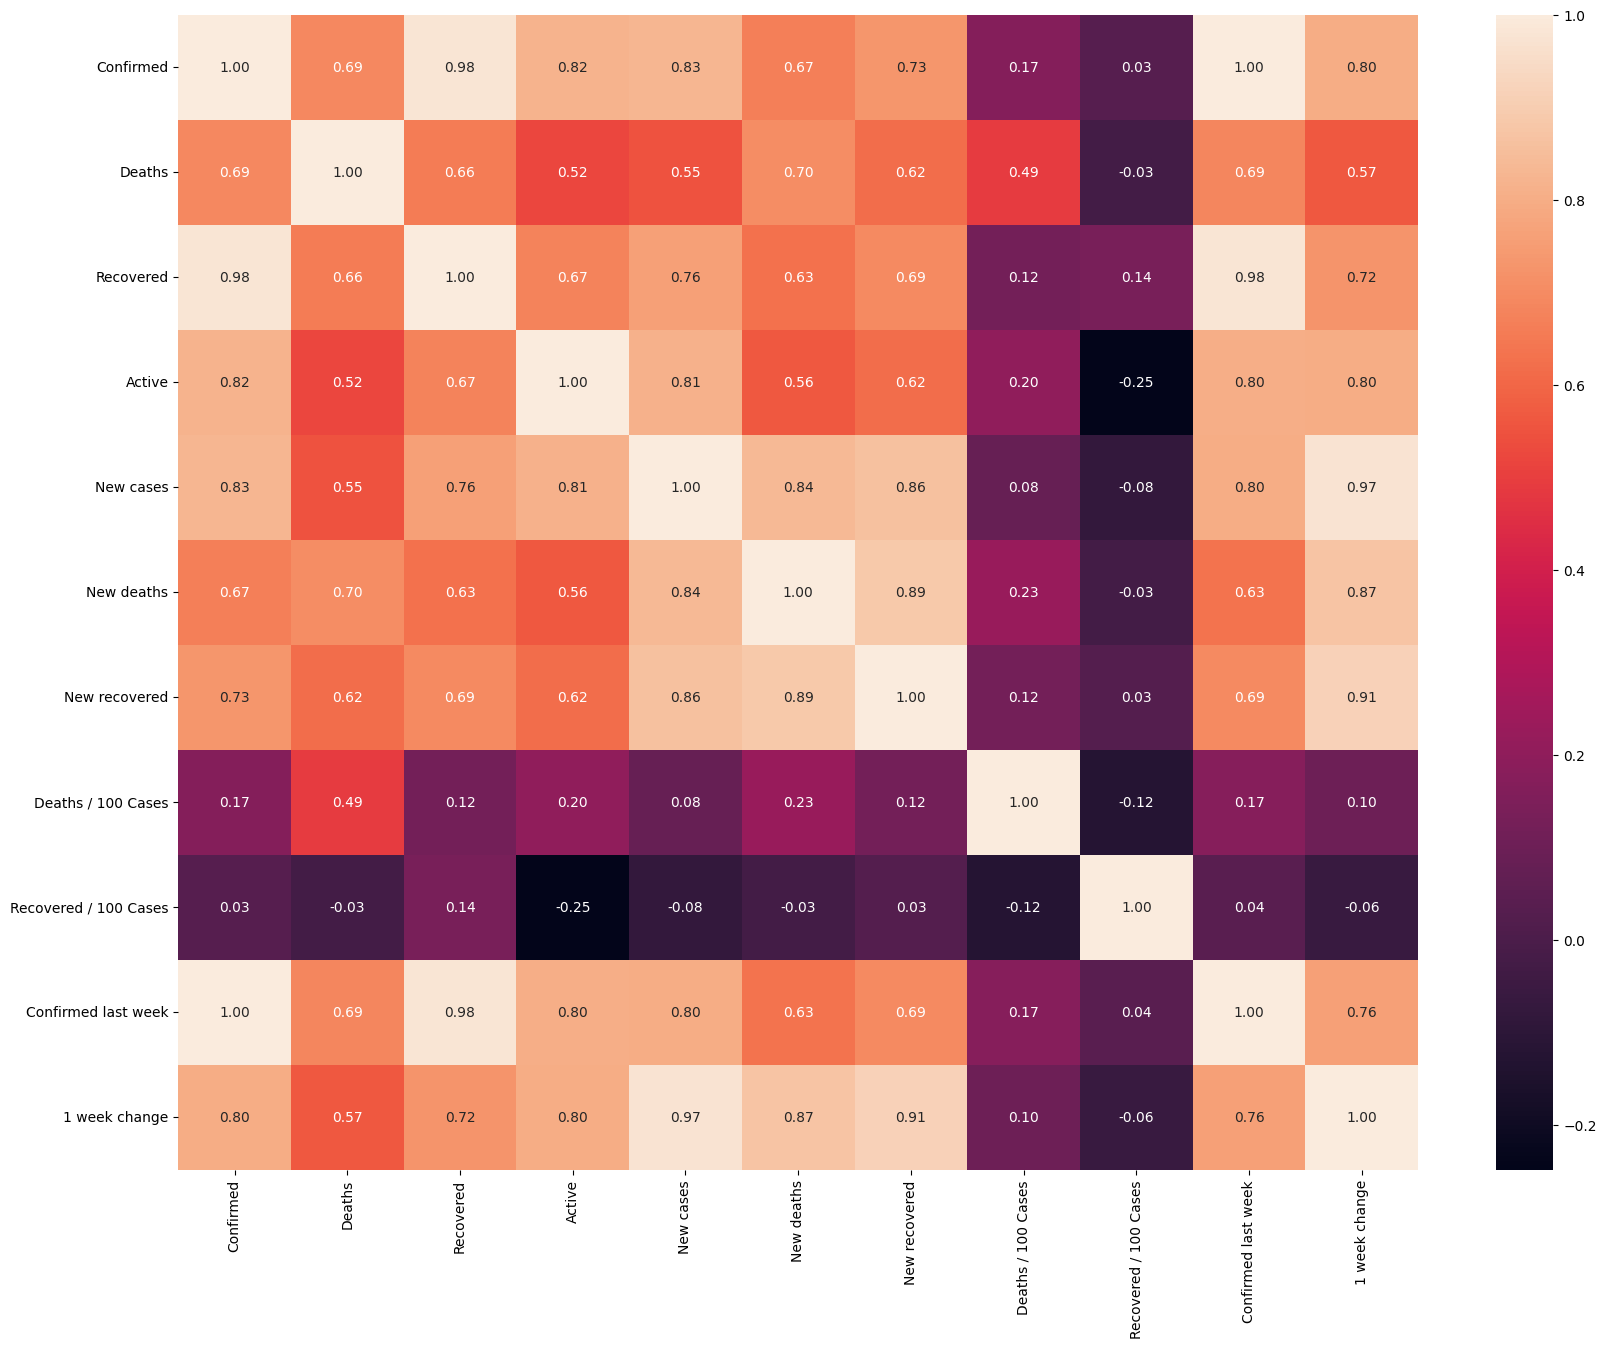

In [78]:
param_list = data.columns
plt.figure(figsize=(20, 15)) 
sns.heatmap(data[param_list[1:]].corr(), annot=True, fmt=".2f")
plt.show() 

Splitting the data

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state=42)

In [80]:
X_train.shape

(129, 12)

In [81]:
X_test.shape

(44, 12)

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 182 to 111
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country/Region         129 non-null    int32  
 1   Confirmed              129 non-null    int64  
 2   Deaths                 129 non-null    int64  
 3   Recovered              129 non-null    int64  
 4   Active                 129 non-null    int64  
 5   New cases              129 non-null    int64  
 6   New deaths             129 non-null    int64  
 7   New recovered          129 non-null    int64  
 8   Deaths / 100 Cases     129 non-null    float64
 9   Recovered / 100 Cases  129 non-null    float64
 10  Confirmed last week    129 non-null    int64  
 11  1 week change          129 non-null    int64  
dtypes: float64(2), int32(1), int64(9)
memory usage: 12.6 KB


In [83]:
X_train.describe()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,95.286822,37828.961240,1264.674419,27424.953488,9139.333333,388.232558,11.302326,333.968992,2.503953,67.738527,34816.015504,3012.945736
std,53.947920,95688.310635,4472.667446,75024.833552,22736.316421,899.613689,39.029957,925.786979,2.103541,24.988038,89943.661922,7016.503897
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-47.000000
25%,51.000000,907.000000,18.000000,646.000000,124.000000,4.000000,0.000000,0.000000,0.940000,51.990000,809.000000,44.000000
50%,96.000000,4548.000000,87.000000,2745.000000,1597.000000,43.000000,1.000000,22.000000,2.000000,74.010000,3748.000000,387.000000
75%,141.000000,33296.000000,466.000000,21205.000000,6791.000000,372.000000,5.000000,213.000000,3.500000,88.530000,27890.000000,2560.000000
max,186.000000,816680.000000,44022.000000,602249.000000,201097.000000,5607.000000,342.000000,8588.000000,11.130000,100.000000,776212.000000,46093.000000


Scaling

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train

array([[ 1.6136163 , -0.28544799, -0.26635131, ..., -1.30201805,
        -0.28908085, -0.18713664],
       [ 1.22283438,  0.43608347,  0.9955172 , ..., -2.72140677,
         0.48253017, -0.23835812],
       [ 1.50196433,  0.22396954, -0.20642266, ...,  0.84333597,
         0.24975884, -0.14721822],
       ...,
       [-1.4940304 ,  0.30867663, -0.16310344, ...,  0.89234968,
         0.35043481, -0.28256884],
       [ 0.10631461, -0.3756945 , -0.26590241, ...,  0.50224878,
        -0.36686476, -0.42078099],
       [ 0.29240124,  3.75233326,  9.59696243, ...,  0.36484971,
         3.51115815,  6.16375462]])

LOGISTIC REGRESSION 

In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
LR_pred_train = LR.predict(X_train)

In [87]:
LRtest = accuracy_score(y_test,LR_pred)
LRtrain =  accuracy_score(y_train,LR_pred_train)
print('Testing Accuracy = ', accuracy_score(y_test,LR_pred))
print('Training Accuracy = ', accuracy_score(y_train,LR_pred_train))

Testing Accuracy =  0.4318181818181818
Training Accuracy =  0.4883720930232558


In [88]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        15
           1       1.00      0.20      0.33         5
           2       0.50      0.50      0.50         2
           3       0.44      0.79      0.56        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.43        44
   macro avg       0.39      0.31      0.30        44
weighted avg       0.41      0.43      0.38        44



LINEAR SVM

In [89]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='linear')
SVC_classifier.fit(X_train,y_train)
SVC_y_pred = SVC_classifier.predict(X_test)
SVC_y_predict_train = SVC_classifier.predict(X_train)

In [90]:
LinearSVMtest = accuracy_score(y_test,SVC_y_pred)
LinearSVMtrain = accuracy_score(y_train,SVC_y_predict_train)
print('Testing Accuracy = ', LinearSVMtest)
print('Training Accuracy = ', LinearSVMtrain)

Testing Accuracy =  0.4090909090909091
Training Accuracy =  0.4883720930232558


In [91]:
print(classification_report(y_test,SVC_y_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        15
           1       1.00      0.20      0.33         5
           2       0.50      0.50      0.50         2
           3       0.38      0.71      0.50        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.41        44
   macro avg       0.38      0.30      0.29        44
weighted avg       0.40      0.41      0.36        44



NON LINEAR SVM

In [92]:
NSVC_classifier = SVC(kernel='poly')
NSVC_classifier.fit(X_train,y_train)
NSVC_y_pred = NSVC_classifier.predict(X_test)
NSVC_y_predict_train = NSVC_classifier.predict(X_train)

In [93]:
NonLinearSVMtest = accuracy_score(y_test,NSVC_y_pred)
NonLinearSVMtrain = accuracy_score(y_train,NSVC_y_predict_train)
print('Testing Accuracy = ', NonLinearSVMtest)
print('Training Accuracy = ', NonLinearSVMtrain)

Testing Accuracy =  0.36363636363636365
Training Accuracy =  0.35658914728682173


In [94]:
print(classification_report(y_test,NSVC_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       1.00      0.20      0.33         5
           2       1.00      0.50      0.67         2
           3       0.33      0.93      0.49        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.36        44
   macro avg       0.47      0.28      0.27        44
weighted avg       0.44      0.36      0.26        44



MLP CLASSIFIER

In [95]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(50, 10), 
    activation='relu',             
    solver='adam',               
    max_iter=1000,               
    random_state=42               
)

mlp_classifier.fit(X_train, y_train)
MLP_y_pred = mlp_classifier.predict(X_test)
MLP_y_predict_train = mlp_classifier.predict(X_train)

In [96]:
MLPtest = accuracy_score(y_test,MLP_y_pred)
MLPtrain = accuracy_score(y_train,MLP_y_predict_train)
print('Testing Accuracy = ', MLPtest)
print('Training Accuracy = ', MLPtrain)

Testing Accuracy =  0.38636363636363635
Training Accuracy =  0.9689922480620154


In [97]:
print(classification_report(y_test,MLP_y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.20      0.20      0.20         5
           2       0.20      0.50      0.29         2
           3       0.53      0.57      0.55        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.39        44
   macro avg       0.24      0.29      0.25        44
weighted avg       0.37      0.39      0.38        44



DECISION TREE CLASSIFIER

In [98]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,splitter='best',criterion='gini')
DTC.fit(X_train,y_train)
d_y_predict = DTC.predict(X_test)
d_y_predict_train = DTC.predict(X_train)

In [99]:
DTCtest = accuracy_score(y_test,d_y_predict)
DTCtrain = accuracy_score(y_train,d_y_predict_train)
print('Testing Accuracy = ', DTCtest)
print('Training Accuracy = ', DTCtrain)

Testing Accuracy =  0.36363636363636365
Training Accuracy =  0.5503875968992248


In [100]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           0       0.36      0.33      0.34        15
           1       0.20      0.20      0.20         5
           2       0.00      0.00      0.00         2
           3       0.45      0.64      0.53        14
           4       0.00      0.00      0.00         4
           5       0.33      0.25      0.29         4

    accuracy                           0.36        44
   macro avg       0.22      0.24      0.23        44
weighted avg       0.32      0.36      0.33        44



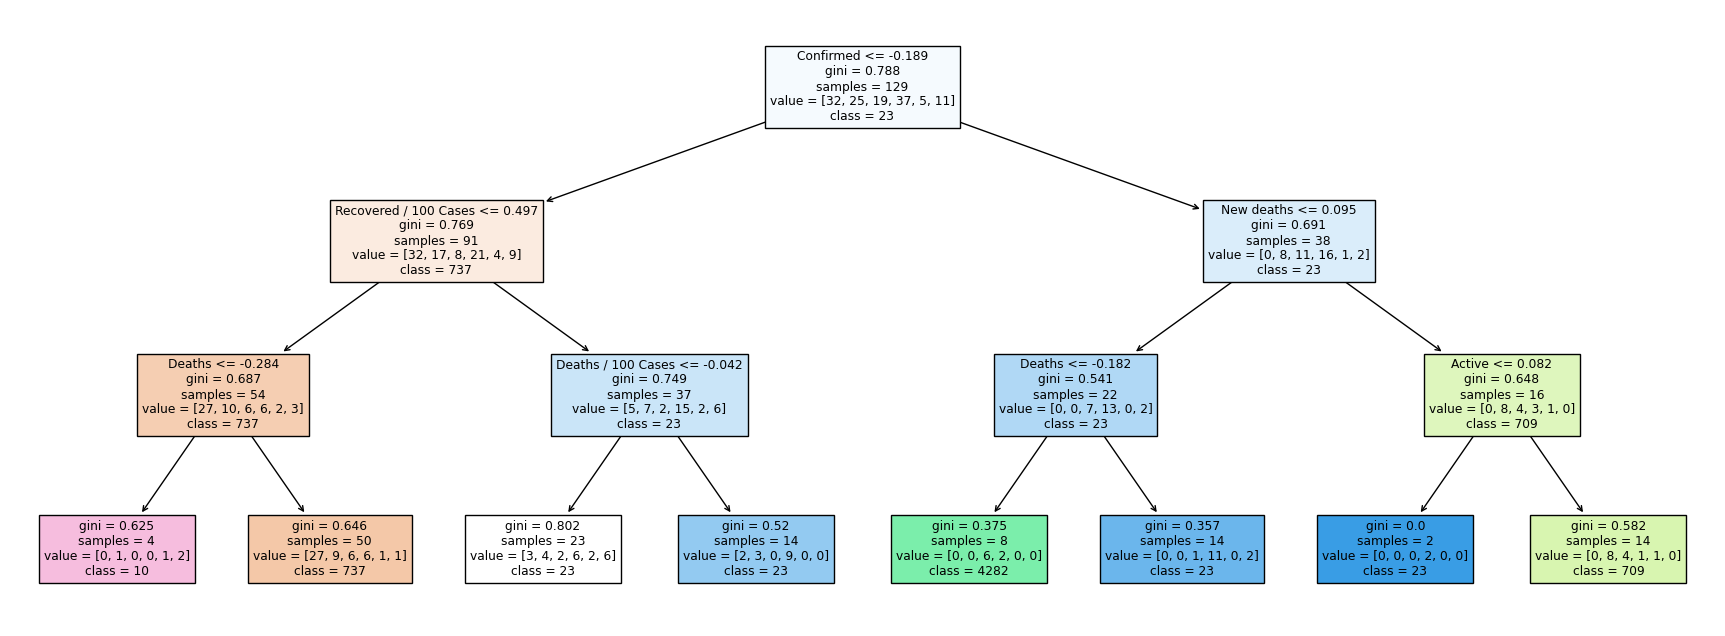

In [101]:
from sklearn.tree import plot_tree
feature_names = list(data.columns[:-1]) 
class_names = [str(class_name) for class_name in data[data.columns[-1]].unique()]
plt.figure(figsize=(22, 8))
plot_tree(DTC, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

RANDOM FOREST

In [102]:
from sklearn.ensemble import RandomForestClassifier
Randomforest =RandomForestClassifier(criterion= 'gini', max_depth = 3)
Randomforest.fit(X_train,y_train)
r_y_predict = Randomforest.predict(X_test)
r_y_predict_train = Randomforest.predict(X_train)

In [103]:
RandomForesttest = accuracy_score(y_test,r_y_predict)
RandomForesttrain = accuracy_score(y_train,r_y_predict_train)
print('Testing Accuracy = ', RandomForesttest)
print('Training Accuracy = ', RandomForesttrain)

Testing Accuracy =  0.4090909090909091
Training Accuracy =  0.627906976744186


In [104]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           0       0.40      0.53      0.46        15
           1       0.25      0.20      0.22         5
           2       0.33      0.50      0.40         2
           3       0.47      0.57      0.52        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.41        44
   macro avg       0.24      0.30      0.27        44
weighted avg       0.33      0.41      0.36        44



ADABOOST CLASSIFIER

In [105]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1)
AdaBoost = abc.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
y_pred_train = AdaBoost.predict(X_train)

In [106]:
Adaboosttest = accuracy_score(y_test,y_pred)
Adaboosttrain =  accuracy_score(y_train,y_pred_train)
print('Testing Accuracy = ', Adaboosttest)
print('Training Accuracy = ', Adaboosttrain)

Testing Accuracy =  0.3181818181818182
Training Accuracy =  0.4186046511627907


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        15
           1       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         2
           3       0.38      0.43      0.40        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4

    accuracy                           0.32        44
   macro avg       0.15      0.18      0.16        44
weighted avg       0.26      0.32      0.28        44



K Means

In [108]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score

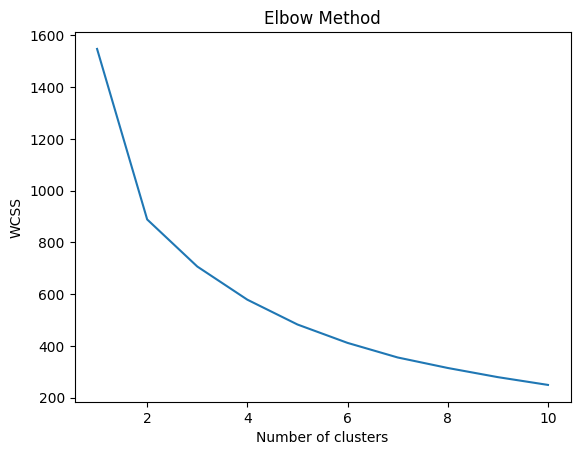

In [109]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [111]:
silhouette_avg1 = silhouette_score(X_train, model.labels_)
print(f'Silhouette Score: {silhouette_avg1}')

Silhouette Score: 0.6834451853863835


Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

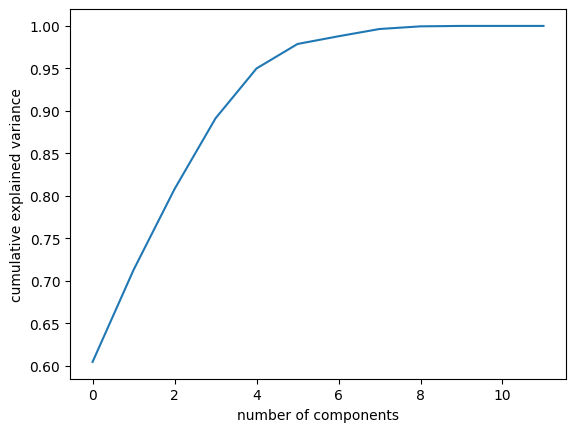

In [112]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [113]:
pca = PCA(n_components=10)
pca.fit(X_train)
data_pca = pca.transform(X_train)

In [114]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.862767,-0.647558,1.642433,-0.975083,0.795016,-0.412028,-0.143673,0.109386,0.052019,0.080899
1,1.306520,0.621862,3.652906,-0.519992,-2.212537,0.286528,-1.315918,-1.131890,0.037418,-0.298529
2,-0.101820,-1.061384,-0.454183,-1.589202,0.571504,-0.062952,-0.016493,-0.013366,-0.066675,0.020279
3,-1.234971,-0.662720,-1.108975,-0.145769,0.741382,0.101369,-0.341089,-0.105731,0.018841,0.003415
4,-1.101758,-0.221413,-0.462664,1.216825,0.258626,-0.320618,-0.043942,-0.147888,-0.015534,-0.001795


In [115]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(data_pca)

KMeans(n_clusters=3, n_init='auto')

In [116]:
silhouette_avg2 = silhouette_score(data_pca, model.labels_)
print(f'Silhouette Score: {silhouette_avg2}')

Silhouette Score: 0.21856437061495543


In [117]:
from tabulate import tabulate
result = [
    ["Logistic Regression", LRtest, LRtrain],
    ["Linear SVM", LinearSVMtest, LinearSVMtrain],
    ["Non-Linear SVM", NonLinearSVMtest, NonLinearSVMtrain],
    ["MLP", MLPtest, MLPtrain],
    ["Decision Tree", DTCtest, DTCtrain],
    ["Random Forest", RandomForesttest, RandomForesttrain],
    ["Adaboost", Adaboosttest, Adaboosttrain],
]

# Create the table
table = tabulate(result, headers=["Classifier", "Test Accuracy", "Train Accuracy"], tablefmt="pretty")

# Print the table
print(table)

+---------------------+---------------------+---------------------+
|     Classifier      |    Test Accuracy    |   Train Accuracy    |
+---------------------+---------------------+---------------------+
| Logistic Regression | 0.4318181818181818  | 0.4883720930232558  |
|     Linear SVM      | 0.4090909090909091  | 0.4883720930232558  |
|   Non-Linear SVM    | 0.36363636363636365 | 0.35658914728682173 |
|         MLP         | 0.38636363636363635 | 0.9689922480620154  |
|    Decision Tree    | 0.36363636363636365 | 0.5503875968992248  |
|    Random Forest    | 0.4090909090909091  |  0.627906976744186  |
|      Adaboost       | 0.3181818181818182  | 0.4186046511627907  |
+---------------------+---------------------+---------------------+


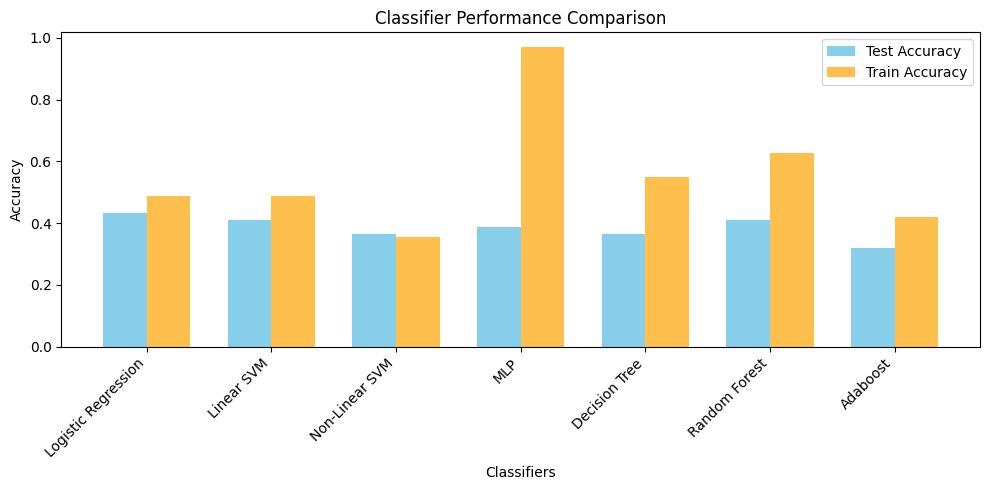

In [118]:
classifiers = ["Logistic Regression", "Linear SVM", "Non-Linear SVM", "MLP", "Decision Tree", "Random Forest", "Adaboost"]
test_accuracies = [LRtest, LinearSVMtest, NonLinearSVMtest, MLPtest, DTCtest, RandomForesttest, Adaboosttest]
train_accuracies = [LRtrain, LinearSVMtrain, NonLinearSVMtrain, MLPtrain, DTCtrain, RandomForesttrain, Adaboosttrain]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 5))

plt.bar(index, test_accuracies, bar_width, color='skyblue', label='Test Accuracy')
plt.bar(index + bar_width, train_accuracies, bar_width, color='orange', label='Train Accuracy', alpha=0.7)

plt.title('Classifier Performance Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(index + bar_width / 2, classifiers, rotation=45, ha='right')
plt.tight_layout()

plt.show()


Agglomerative Clustering 

In [119]:
x = pd.DataFrame(X_train)

In [120]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

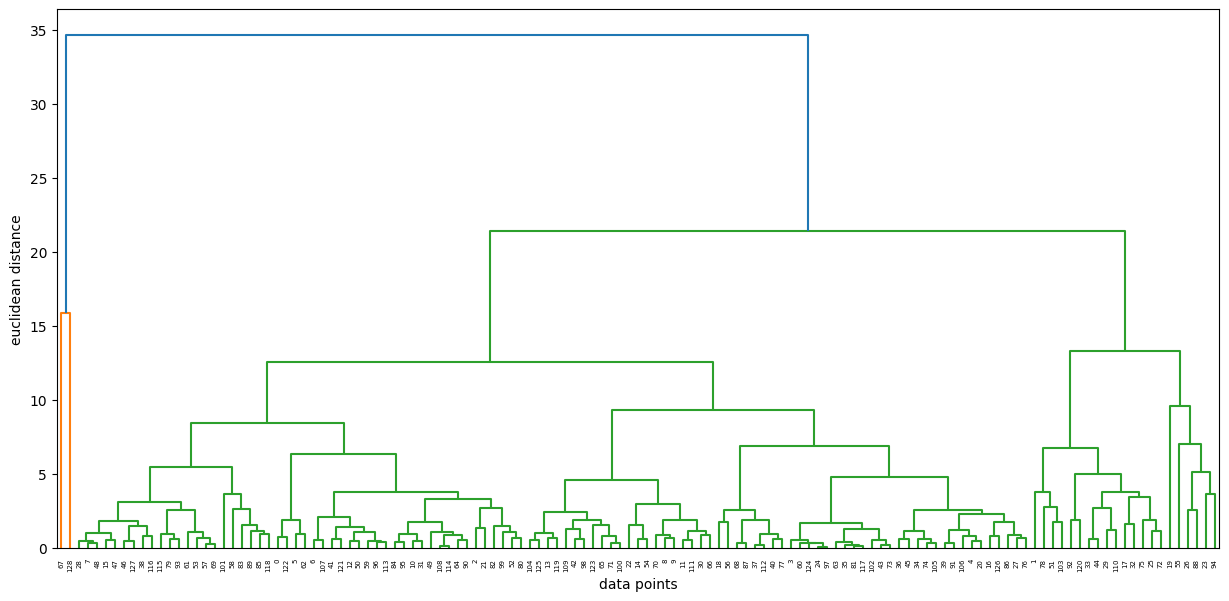

In [121]:
plt.figure(figsize = (15,7))
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(x, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [122]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(x)
x["label"] = cluster

In [123]:
x.label.value_counts()

0    127
1      2
Name: label, dtype: int64

In [124]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,1.613616,-0.285448,-0.266351,-0.316765,-0.103688,-0.263617,-0.239267,-0.362147,-0.846605,-1.302018,-0.289081,-0.187137,0
1,1.222834,0.436083,0.995517,-0.366970,2.850389,0.010900,-0.213546,-0.362147,2.231607,-2.721407,0.482530,-0.238358,0
2,1.501964,0.223970,-0.206423,0.335660,-0.124396,-0.138634,-0.264989,-0.006473,-0.918192,0.843336,0.249759,-0.147218,0
3,-0.023946,-0.396667,-0.283859,-0.366716,-0.403494,-0.433237,-0.290710,-0.362147,-1.194992,1.095234,-0.388384,-0.430939,0
4,-1.233509,-0.372453,-0.278921,-0.346230,-0.370157,-0.409803,-0.290710,-0.250457,-0.741612,-0.046544,-0.365481,-0.394312,0


In [125]:
silhouette_avg_agglo = silhouette_score(x, hc.labels_)
print(f'Silhouette Score: {silhouette_avg_agglo}')

Silhouette Score: 0.8234383633461431
